<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Laboratorio #3 Aprendizaje estadistico,regresión lineal</b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

## Importación de liberias

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Laboratorio 03











## Pregunta 1
1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|


In [5]:
Y=range(0,6)
X_1=range(0,6)
df=pd.DataFrame({'Y':Y,'X_1':X_1})
df['Entrenamiento']=[0,1,2,3,4,'m']
df.set_index('Entrenamiento',inplace=True)

In [6]:
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
m,5,5


## Pregunta 2

2. Crear una función para calcular la función de coste.

Según el notebook la función coste sería




\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}

In [7]:
def coste(Xs,Ys,o0,o1,m):
  value=0
  for i in range(len(Xs)-1):
    value+=((o0+o1*Xs[i])-Ys[i] )**2
  return value/(2*m)

## Pregunta 3


3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.

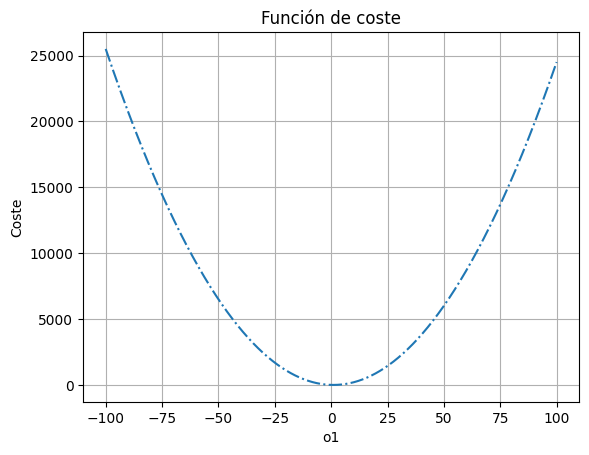

In [8]:
o1s=np.linspace(-100,100,10000)
costs=[]
for i in o1s:
  costs.append(coste(df['X_1'],df['Y'],0,i,len(df)))

plt.title('Función de coste')
plt.xlabel('o1')
plt.ylabel('Coste')
plt.plot(o1s,costs,'-.')
plt.grid(True)
plt.show()


Este seria el valor minimo de la función costo teninedo en cuenta el valor fijo de $\theta_{0}$

In [9]:
min(costs)

np.float64(0.00024507401235115907)

Que corresponderia a un valor de $\theta_{1}$

In [10]:
o1s[costs.index(min(costs) )]

np.float64(0.9900990099010016)

Ahora la función quedaria ajustada con este parametro de la siguiente forma

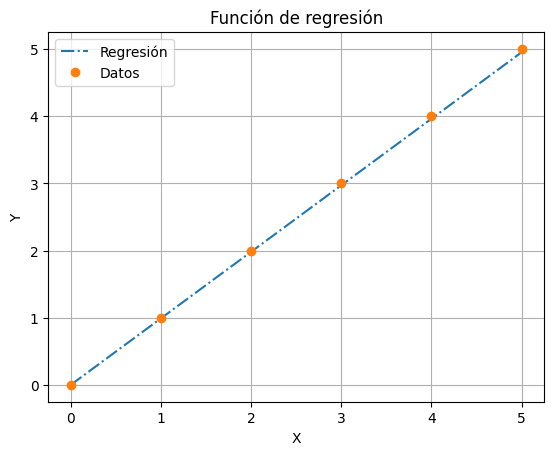

In [11]:
y=lambda x: o1s[costs.index(min(costs) )]*x
ys=[]
for i in df['X_1']:
  ys.append(y(i))

plt.plot(df['X_1'],ys,'-.')
plt.plot(df['X_1'],df['Y'],'o')

plt.title('Función de regresión')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Regresión','Datos'])
plt.grid(True)
plt.show()



Noto que efectivamente se parece mucho, esto debido a que al sacar el valor de $\theta_{1}$,que hacia que la función de coste fuera muy pequeña, utilicé muchos valores de prueba en linspace. No es tan exacta si se toman valores muy separados

## Pregunta 4

4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.


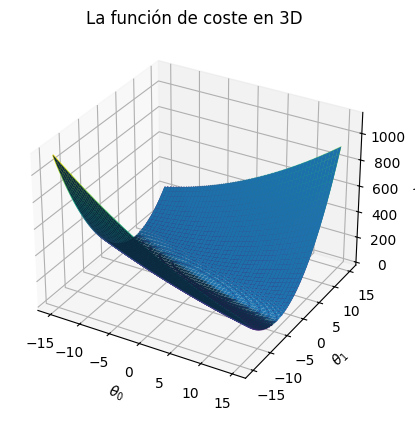

In [12]:
coorde=np.arange(-15,15,0.1)


t0,t1=np.meshgrid(coorde,coorde)
J=coste(df['X_1'],df['Y'],t0,t1,len(df))

fig = plt.figure()
ax = plt.axes(111,projection="3d")
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
ax.set_title("La función de coste en 3D")
plt.show()

## Pregunta 5

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.


Para esto basicamente hay que aplicar la formula para los datos dados, pero al ser una sumatoria, la función coste se puede dar en terminos de la suma geometrica.


\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



El problema menciona que se debe de dar en 1 y 2 dimensiones. Supongo que para una dimensión será considerando un valor de $θ_{0}$ fijo. En particular será sin ponerlo dentro de la formula, así quedaria de la siguiente forma


\begin{equation}
J(\theta_1)=\frac{1}{2m} \sum_{i=0}^m ( \theta_1 X- y^{(i)})^2
\end{equation}

\begin{equation}
J(\theta_1)= \frac{1}{2m}\sum_{i=0}^4((θ_{1}X)^2-2\theta_{1}Xy^{(i)}+(y^{(i)})^2 )
\end{equation}

\begin{equation}
J(\theta_1)= \frac{1}{2m}\sum_{i=0}^4((θ_{1}X)^2-2\theta_{1}Xy^{(i)}+(y^{(i)})^2 )
\end{equation}

Claramente $X=X^{(i)}$
\begin{equation}
J(\theta_1) = \frac{1}{2m} \sum_{i=0}^{4} \left( (\theta_1 X^{(i)})^2 - 2\theta_1 X^{(i)} y^{(i)} + (y^{(i)})^2 \right)
\end{equation}

\begin{equation}
J(\theta_1) = \frac{1}{2m} \left[
\sum_{i=0}^{4} (\theta_1 X^{(i)})^2
- \sum_{i=0}^{4} 2\theta_1 X^{(i)} y^{(i)}
+ \sum_{i=0}^{4} (y^{(i)})^2
\right]
\end{equation}

Y como los datos los tenemos de las preguntas anteriores entonces se tendría lo siguiente $X^{(i)}=y^{(i)}=i$:

\begin{equation}
J(\theta_1) = \frac{1}{2m} \sum_{i=0}^{4} \left( \theta_1^2 (x^{(i)})^2 - 2\theta_1 (x^{(i)})^2 + (x^{(i)})^2 \right)
= \frac{1}{2m} \sum_{i=0}^{4} (x^{(i)})^2 \left( \theta_1^2 - 2\theta_1 + 1 \right)
\end{equation}

y como

\begin{equation}
\sum_{i=0}^{4} (x^{(i)})^2 = 0^2 + 1^2 + 2^2 + 3^2 + 4^2 = 30
\end{equation}


\begin{equation}
J(\theta_1) = \frac{1}{2 \cdot 5} \cdot 30 \cdot (\theta_1^2 - 2\theta_1 + 1) = 3(\theta_1^2 - 2\theta_1 + 1)
\end{equation}


Por otro lado se puede realizar para el caso 2 dimensional, ahora la función de coste dependería también de $θ_{0}$, entonces quedaria de la sigueinte forma




\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X^{(i)})- y^{(i)})^2
\end{equation}


\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=0}^{4} \left( \theta_0 + \theta_1 x^{(i)} - x^{(i)} \right)^2
\end{equation}


\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2 \cdot 5} \sum_{i=0}^{4} \left( \theta_0 + (\theta_1 - 1) x^{(i)} \right)^2
\end{equation}

\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{2 \cdot 5} \sum_{i=0}^{4} \left( \theta_0 + (\theta_1 - 1) x^{(i)} \right)^2
\end{equation}

\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{10} \sum_{i=0}^{4} \left( \theta_0^2 + 2\theta_0(\theta_1 - 1)x^{(i)} + (\theta_1 - 1)^2 (x^{(i)})^2 \right)
\end{equation}

\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{10} \left[ 5\theta_0^2 + 2\theta_0(\theta_1 - 1) \sum_{i=0}^{4} x^{(i)} + (\theta_1 - 1)^2 \sum_{i=0}^{4} (x^{(i)})^2 \right]
\end{equation}

y como se cumple que:


\begin{equation}
\sum_{i=0}^{4} x^{(i)} = 0 + 1 + 2 + 3 + 4 = 10,\quad \sum_{i=0}^{4} (x^{(i)})^2 = 0^2 + 1^2 + 2^2 + 3^2 + 4^2 = 30
\end{equation}


\begin{equation}
J(\theta_0, \theta_1) = \frac{1}{10} \left[ 5\theta_0^2 + 20\theta_0(\theta_1 - 1) + 30(\theta_1 - 1)^2 \right]
\end{equation}



Así estas serían las 2 expresiones para el caso 1 y 2 Dimensional




# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función

In [13]:
def Gradien(Xs,f,a,df,e=1E-4):
  wi=np.random.choice(Xs)
  wi_1=wi-a*df(wi)
  while abs(f(wi_1)-f(wi))>e:
    wi=wi_1
    wi_1=wi-a*df(wi)
  return wi_1

## Pregunta 6

6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$

In [29]:
f=lambda x: (x-4)**2
dif=lambda x: 2*(x-4)


In [30]:
print("Para un α=0.001 el valor del minimo sería",Gradien(range(10),f,0.001,dif))

Para un α=0.001 el valor del minimo sería 4.0


In [31]:
print("Para un α=0.01 el valor del minimo seria",Gradien(range(10),f,0.01,dif))

Para un α=0.01 el valor del minimo seria 4.048904012331455


In [32]:
print("Para un α=0.1 el valor del minimo seria",Gradien(range(10),f,0.001,dif))

Para un α=0.1 el valor del minimo seria 4.157575831769977


## Pregunta 7

7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

Serguiré la forma de solución del video. Tomaré el dominio de $(-2,2)$ para los valores para $x$  y para $y$

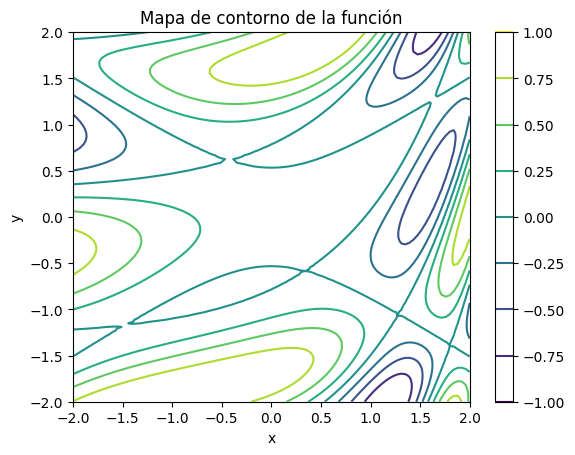

In [18]:
# Mapa de contorno

funcion= lambda th: np.sin(1 / 2 * th[0] ** 2-1/4 * th[1]**2 +3)*np.cos(2* th[0]+ 1-np.e ** th[1] )
puntos=100
X=np.linspace(-2,2,puntos)
Y=np.linspace(-2,2,puntos)

Z=np.zeros((len(X),len(Y)))

for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[ix,iy]=funcion([x,y])

plt.contour(X,Y,Z)
plt.title("Mapa de contorno de la función")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

Sin embargo se puede ver de una forma diferente que tal vez ayude a una mejor visualización de las curvas de nivel, seria de la siguiente forma

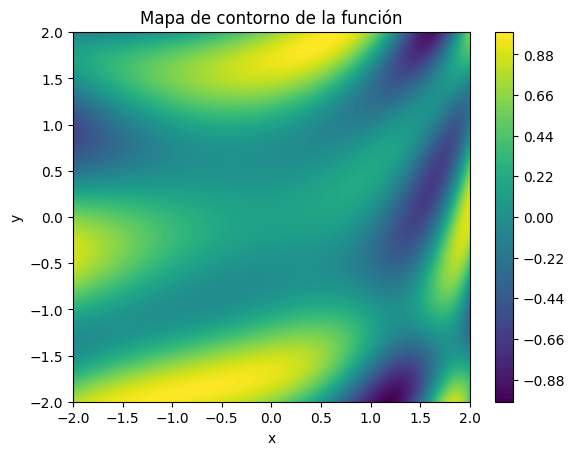

In [19]:
plt.contourf(X,Y,Z,100)
plt.title("Mapa de contorno de la función")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar()
plt.show()

Por otro lado la figura en 3D quedaría de la siguiente forma

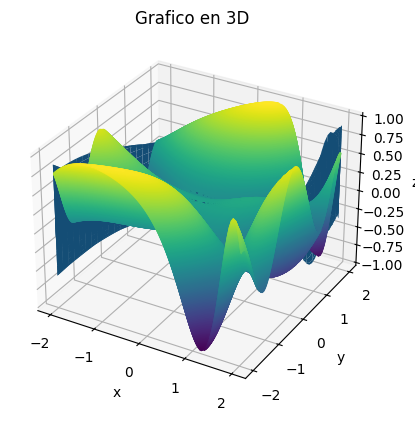

In [20]:

fig = plt.figure()
ax = plt.axes(111,projection="3d")
ax.plot_surface(X, Y, Z )
ax.contour(X, Y, Z, 500,   linestyles="solid")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.title("Grafico en 3D ")
plt.show()

Ahora encontraré el valor minimo de la función con el metodo de gradiente descendente.


Hay que tener en cuenta que esto da un minimo local, no global, pues depende de donde se ponga el Theta incial este caerá a un minimo diferente. Así que no puedo asegurar que el valor a calcular sea el minimo, necesitaria otro criterio. Además de que el dominio que pasé está acotado, pude haber tomado otro y eso cambiaría completamente el resultado.

In [21]:
Theta=np.random.rand(2)*4-2

T=np.copy(Theta)

lr=0.001
h=0.00001
grad=np.zeros(2)
for _ in range(1000):
  for it,th in enumerate(Theta):

    T=np.copy(Theta)

    T[it]=T[it]+h
    derivada=(funcion(T)-funcion(Theta))/h
    grad[it]=derivada

  Theta=Theta -lr*grad
print('El valor de un minimo de la función quedaria',funcion(Theta))





El valor de un minimo de la función quedaria -0.78382823453887


In [22]:
print("Las coordenadas de este minimo serían", Theta)

Las coordenadas de este minimo serían [ 0.93627435 -2.27711145]


# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

## Pregunta 8
8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

Basicamente se tiene una situación similar. En el sentido de que se la dependencia de $y$ en terminos de los datos $X$.

In [23]:
X=np.linspace(0,1,100)
y=lambda x: 0.2 + 0.2*x + 0.02*np.random.random(100)
Ys=y(X)

Ahora si no se supiera la formula exacta de $y=y(X)$ se supone de la forma $y=mx+b$ donde m y b serían los valores a encontrar. Ahora, se puede usar la función de coste para cada parametro y ver donde cae el minimo de cada uno por medio del gradiente descendente y usar estos como los parametro $m$ y $b$

Usando lo anterior se recoge lo siguiente:

En el punto 2 la función de coste está definida, así al reemplazar $θ_1$ y $θ_2$ nos daria un valor que depende de 2 parametros, tal como se obtuvo en la pregunta 4, esta función de coste es la que queremos minimizar. Como se realizó en el punto 7 para una función de 2 variables. Así, solo seria aplicar lo realizado en estos puntos para realizar el 8

El valor de un minimo de la función quedaria 1.7287778443427607e-05
El valor de theta0 sería 0.20740819227889798
El valor de theta1 sería 0.20721181187887847


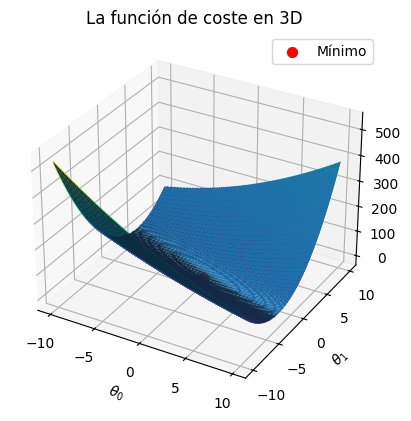

In [24]:
# Plantendo las funciones de coste dadas en la respuesta 2
def coste(Xs,Ys,o0,o1,m):
  value=0
  for i in range(len(Xs)-1):
    value+=((o0+o1*Xs[i])-Ys[i] )**2
  return value/(2*m)

#Valores de Z para distintos valores de thetas(según mi respuesta en 4)
coorde=np.arange(-10,10,0.1)


t0,t1=np.meshgrid(coorde,coorde)
J=coste(df['X_1'],df['Y'],t0,t1,len(df))

fig = plt.figure()
ax = plt.axes(111,projection="3d")
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")




#Aplicando lo mismo de la respuesta 7
Theta=np.random.rand(2)*20-10
T=np.copy(Theta)
lr=0.1
h=0.00001
grad=np.zeros(2)
for _ in range(1000):
  for it,th in enumerate(Theta):
    T=np.copy(Theta)
    T[it]=T[it]+h
    derivada=(coste(X,Ys,T[0],T[1],len(X))-coste(X,Ys,Theta[0],Theta[1],len(X)))/h
    grad[it]=derivada
  Theta=Theta -lr*grad

print('El valor de un minimo de la función quedaria',coste(X,Ys,Theta[0],Theta[1],len(X)))
print('El valor de theta0 sería',Theta[0])
print('El valor de theta1 sería',Theta[1])
ax.scatter(Theta[0], Theta[1], coste(X, Ys, Theta[0], Theta[1], len(X)), color='red', s=50, label='Mínimo')
ax.legend()
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
ax.set_zlabel("J")
ax.set_title("La función de coste en 3D")

plt.show()



En la grafica se ve un puntico en todo el centro de las curvas de nivel, así que creo que está bien.

## Pregunta 9

9. Compare su resultado empleando la libreria linearRegresion() de sklearn.


Basicamente importaré la libreria y le introduciré los datos para realizar el modelamiento. Al momento de investigar en como usarlo, me doy cuenta que usualmente se separan los datos en 2 partes, unos de entrenamiento y otro de test, para ver si efectivamente si sirve o no. Sin embargo esto no es lo que pide el punto 9 así que usaré todos los datos de una vez para encontrar tanto $θ_1$ como $\theta_{2}$ es decir la pendiente y el intercepto


In [25]:

regre=LinearRegression()
regre.fit(X.reshape(-1,1),Ys.reshape(-1,1))

LinearRegression()

In [26]:
regre.coef_


array([[0.20082308]])

In [27]:
regre.intercept_

array([0.21070081])

Noto que se parecen mucho a  los valores que encontré en el punto #8, sacaré sus errores porcentuales tomando como valor real el valor de sklearn y lo estimado como el que encontré en el punto 8 mediante la formula


$error=\frac{|\theta_{real}-\theta_{estimado}|}{\theta_{real}}*100$

In [35]:
print("El error para el intercepto es",abs(regre.intercept_-Theta[0])/Theta[0]*100,"%")
print("El error para la pendiente es",(abs(regre.coef_-Theta[1])/Theta[1]*100)[0],"%")

El error para el intercepto es [1.58750829] %
El error para la pendiente es [3.08318867] %


Lo que muestra que es una buena aproximación mediante el metodo de encontrar el error via el gradiente descendente